In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision
from torchvision import models, transforms
from PIL import Image
import numpy as np
import json
import math
import os
import matplotlib.pyplot as plt
import copy

In [5]:
def imshow(original, mean, std):
    img = copy.deepcopy(original)
    for channel in range(len(img)):
        img[channel] = img[channel] * std[channel] + mean[channel]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [6]:
pretrain_alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/nvty13/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100.0%


In [7]:
pretrain_alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [8]:
def printnorm(self, input, output):
    # input is a tuple of packed inputs
    # output is a Variable. output.data is the Tensor we are interested
    print('Inside ' + self.__class__.__name__ + ' forward')
    print('')
    print('input: ', type(input))
    print('input[0]: ', type(input[0]))
    print('output: ', type(output))
    print('')
    print('input size:', input[0].size())
    print('output size:', output.data.size())
    print('output norm:', output.data.norm())
    print('')
    print('output:\n', output.data)
    name_of_each_layer.append(self.__class__.__name__)
    output_size_of_each_layer.append(output.data.size())
    outputs_of_each_layer.append(output.data)

In [9]:
def printclassifier(self, input, output):
    # input is a tuple of packed inputs
    # output is a Variable. output.data is the Tensor we are interested
    print('Inside ' + self.__class__.__name__ + ' forward')
    print('')
    print('input: ', type(input))
    print('input[0]: ', type(input[0]))
    print('output: ', type(output))
    print('')
    print('input size:', input[0].size())
    print('output size:', output.data.size())
    print('output norm:', output.data.norm())
    print('')
    print('output:\n', output.data)
    name_of_each_layer_classifier.append(self.__class__.__name__)
    output_size_of_each_layer_classifier.append(output.data.size())
    outputs_of_each_layer_classifier.append(output.data)

In [10]:
name_of_each_layer = []
output_size_of_each_layer = []
outputs_of_each_layer = []

In [11]:
name_of_each_layer_classifier = []
output_size_of_each_layer_classifier = []
outputs_of_each_layer_classifier = []

In [12]:
for i in range(len(pretrain_alexnet.features)):
    pretrain_alexnet.features[i].register_forward_hook(printnorm)

In [13]:
for i in range(len(pretrain_alexnet.classifier)):
    pretrain_alexnet.classifier[i].register_forward_hook(printclassifier)

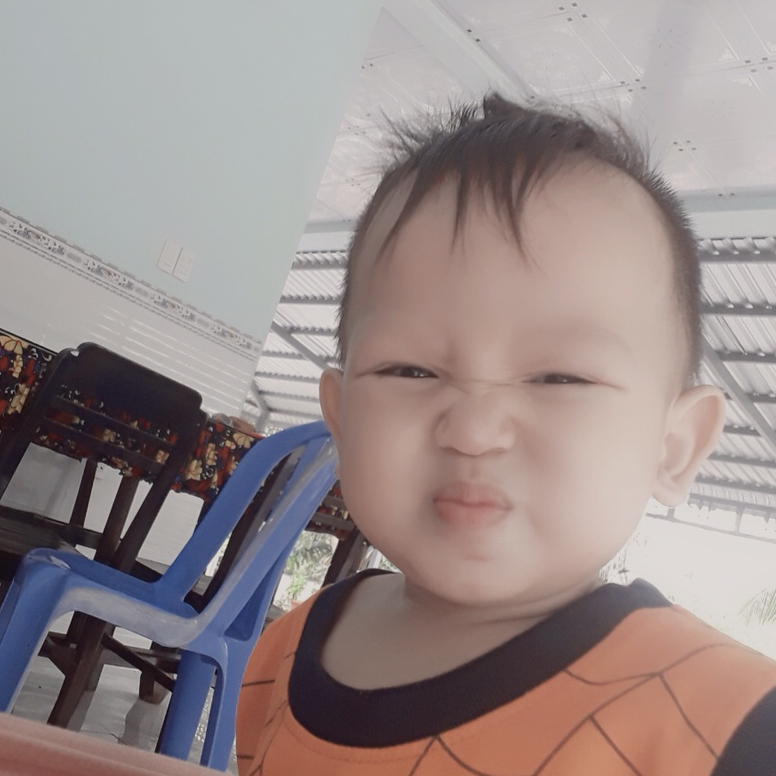

In [14]:
image_fp = "BEN.jpg"
img_PIL = Image.open(image_fp)
img_PIL

In [16]:
# 前処理
preprocess1 = transforms.Compose([
   transforms.Scale(224),
   transforms.CenterCrop(224)  # 画像を正方形で切り取る
])

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

preprocess2 = transforms.Compose([
   transforms.ToTensor(),
   transforms.Normalize(
       mean=mean,
       std=std
   )
])

In [17]:
img_center_crop = preprocess1(img_PIL)
img_tensor = preprocess2(img_center_crop)
img_tensor.unsqueeze_(0)

tensor([[[[ 0.8447,  0.8447,  0.8789,  ...,  1.2728,  1.2899,  1.2899],
          [ 0.8447,  0.8618,  0.8447,  ...,  1.2899,  1.3070,  1.2899],
          [ 0.8618,  0.8789,  0.8618,  ...,  1.2899,  1.2899,  1.2899],
          ...,
          [ 0.1426,  0.1083,  0.1083,  ..., -0.8507, -0.8507, -0.8507],
          [ 0.2453,  0.1939,  0.1768,  ..., -0.8507, -0.8335, -0.8164],
          [ 0.3481,  0.3481,  0.2967,  ..., -0.8335, -0.7993, -0.7650]],

         [[ 1.1506,  1.1506,  1.1506,  ...,  1.3606,  1.3782,  1.3782],
          [ 1.1506,  1.1506,  1.1506,  ...,  1.3606,  1.3606,  1.3782],
          [ 1.1155,  1.1331,  1.1331,  ...,  1.3782,  1.3782,  1.3782],
          ...,
          [-0.6001, -0.6176, -0.6176,  ..., -0.8452, -0.8452, -0.8277],
          [-0.4601, -0.4776, -0.4951,  ..., -0.8627, -0.8627, -0.8452],
          [-0.3025, -0.3025, -0.3550,  ..., -0.8627, -0.8627, -0.8452]],

         [[ 1.3502,  1.3502,  1.3502,  ...,  1.5768,  1.5942,  1.5942],
          [ 1.3851,  1.3851,  

In [18]:
save_dir = os.path.join(os.getcwd(), os.path.splitext(image_fp)[0])
os.makedirs(save_dir, exist_ok=True)

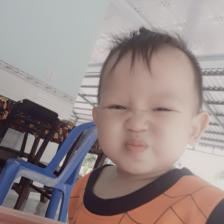

In [19]:
img_center_crop

In [20]:
img_center_crop.save(os.path.join(save_dir, 'input_image.jpg'), 'JPEG', quality=100, optimize=True)

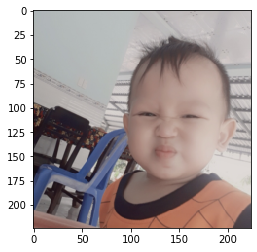

In [21]:
imshow(img_tensor[0], mean, std)
plt.show()

In [22]:
pretrain_alexnet.eval()
output = pretrain_alexnet.forward(img_tensor)
softmax = nn.Softmax()
output = softmax(output)
print("last output:\n", output)

Inside Conv2d forward

input:  <class 'tuple'>
input[0]:  <class 'torch.Tensor'>
output:  <class 'torch.Tensor'>

input size: torch.Size([1, 3, 224, 224])
output size: torch.Size([1, 64, 55, 55])
output norm: tensor(800.3861)

output:
 tensor([[[[-6.0063e-02, -1.4492e+00, -1.4583e+00,  ..., -1.5512e+00,
           -1.5880e+00, -1.4455e+00],
          [-1.2465e-01, -1.4564e+00, -1.3784e+00,  ..., -1.3284e+00,
           -1.2523e+00, -1.4049e+00],
          [-2.1579e-01, -1.4072e+00, -1.3792e+00,  ..., -1.4299e+00,
           -1.4573e+00, -1.2303e+00],
          ...,
          [-3.1921e+00, -2.0933e+00, -1.9339e+00,  ..., -4.5595e-01,
            4.3409e-01, -5.7420e-01],
          [-3.4028e+00, -2.1500e+00, -2.3864e+00,  ...,  1.9606e-01,
           -2.9132e-01, -8.5148e-01],
          [-2.3662e+00, -1.0703e+00, -1.3031e+00,  ..., -1.8063e-01,
           -8.3729e-01, -8.9985e-01]],

         [[-7.9942e+00, -7.8906e+00, -7.9034e+00,  ..., -8.4631e+00,
           -8.5432e+00, -1.0953e+01]

/home/nvty13/PycharmProjects/MachineLearningCoban/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


In [23]:
values, indices = output.max(1)
print(indices)
print("%f"%values)

tensor([589])
0.048921


In [25]:
class_index = json.load(open('imagenet_class_index.json', 'r'))

In [26]:
print(np.max(output.data.numpy()), class_index[str(np.argmax(output.data.numpy()))])

0.048920956 ['n03483316', 'hand_blower']


In [27]:
outputs_of_each_layer

[tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           ...,
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            4.3409e-01, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.9606e-01,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00]],
 
          [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           ...,
           [0.0000e+00, 0.0000e+00, 0.

In [29]:
def plot_out(images, title=None, figsize=(15, 15)):
    plt.figure(figsize=figsize)
    if title:
        plt.title(title)
    for i in range(len(images)):
        plt.subplot(math.ceil(math.sqrt(len(images))), math.ceil(math.sqrt(len(images))), i+1)
        plt.tick_params(labelbottom="off",bottom="off") # x軸の削除
        plt.tick_params(labelleft="off",left="off") # y軸の削除
        plt.box("off") #枠線の削除
        plt.imshow(images[i])

0	Name:Conv2d	Output size:[64, 55, 55]


<Figure size 432x288 with 0 Axes>

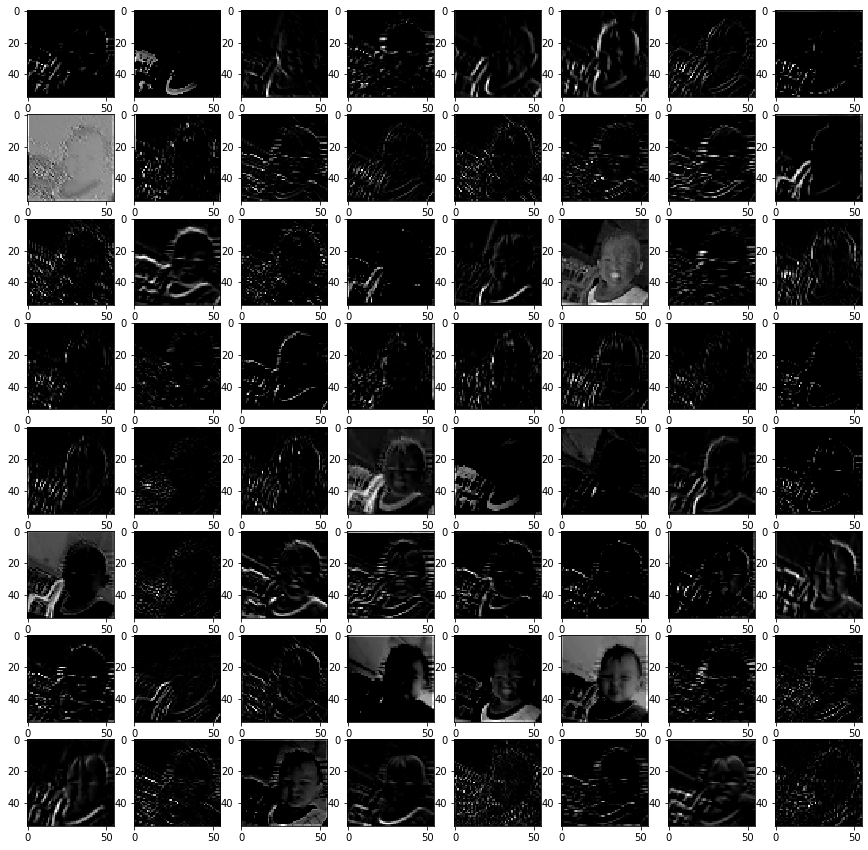

1	Name:ReLU	Output size:[64, 55, 55]


<Figure size 432x288 with 0 Axes>

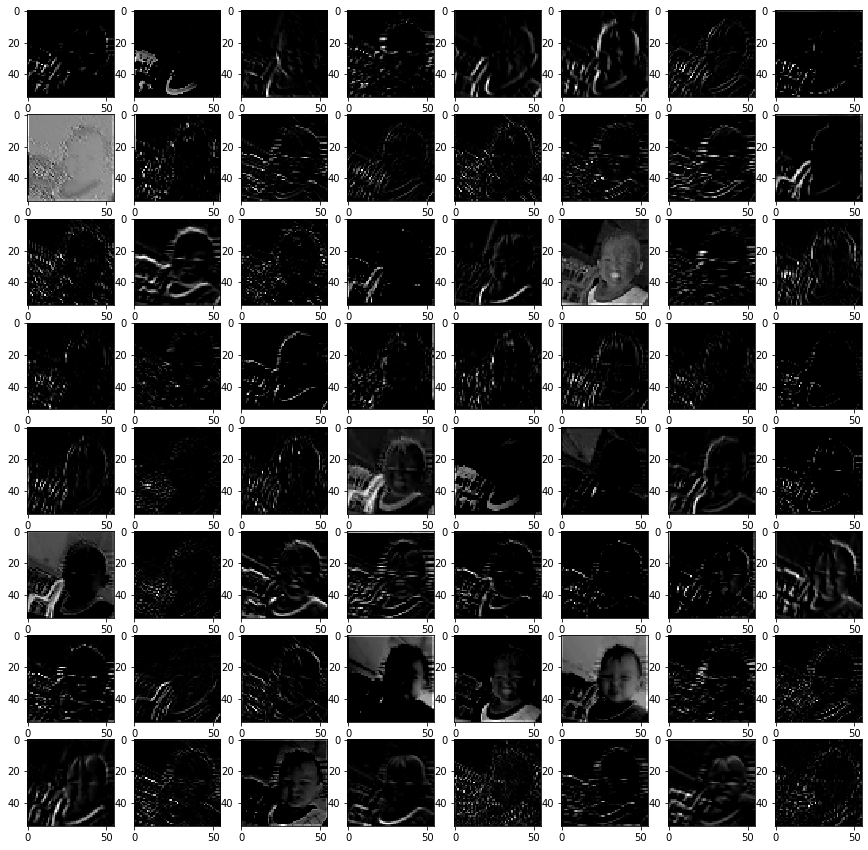

2	Name:MaxPool2d	Output size:[64, 27, 27]


<Figure size 432x288 with 0 Axes>

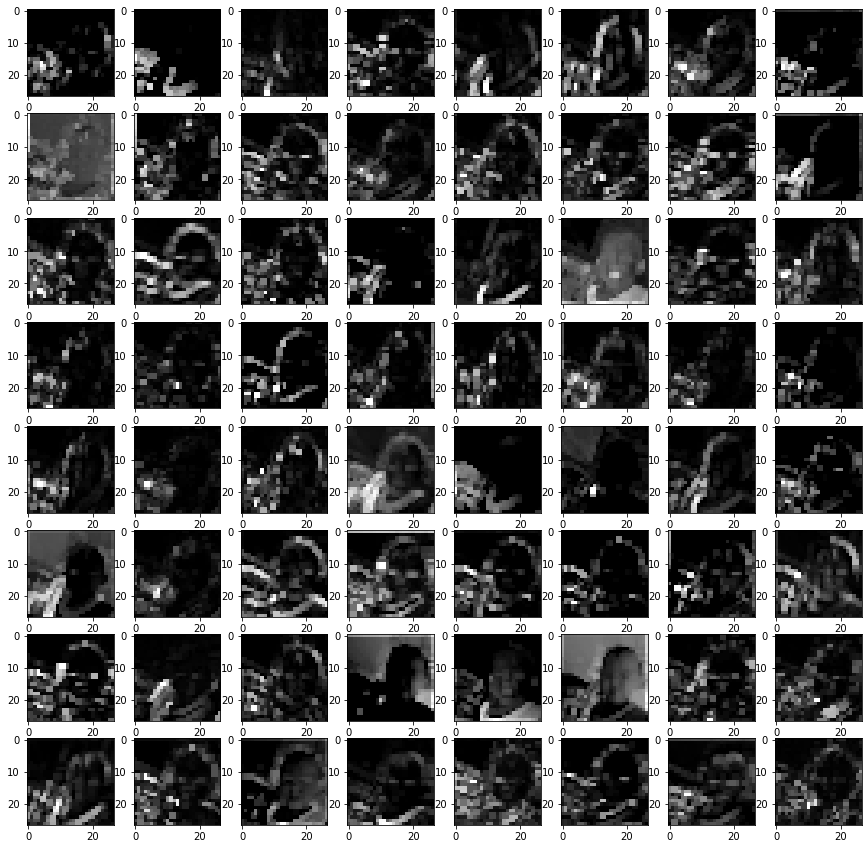

3	Name:Conv2d	Output size:[192, 27, 27]


<Figure size 432x288 with 0 Axes>

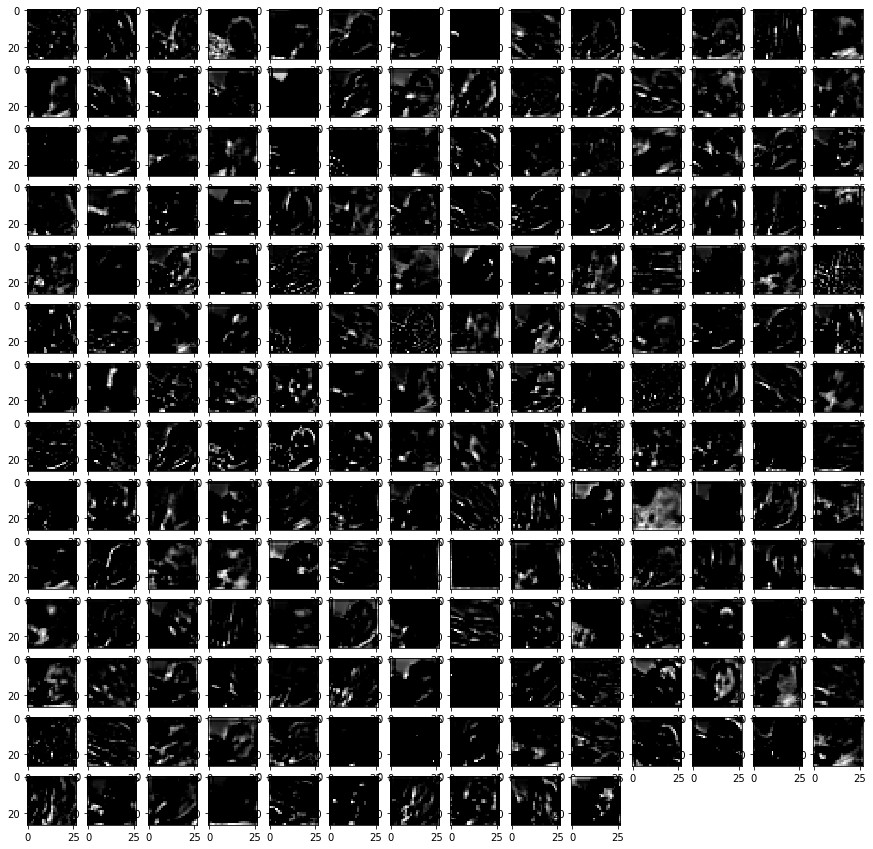

4	Name:ReLU	Output size:[192, 27, 27]


<Figure size 432x288 with 0 Axes>

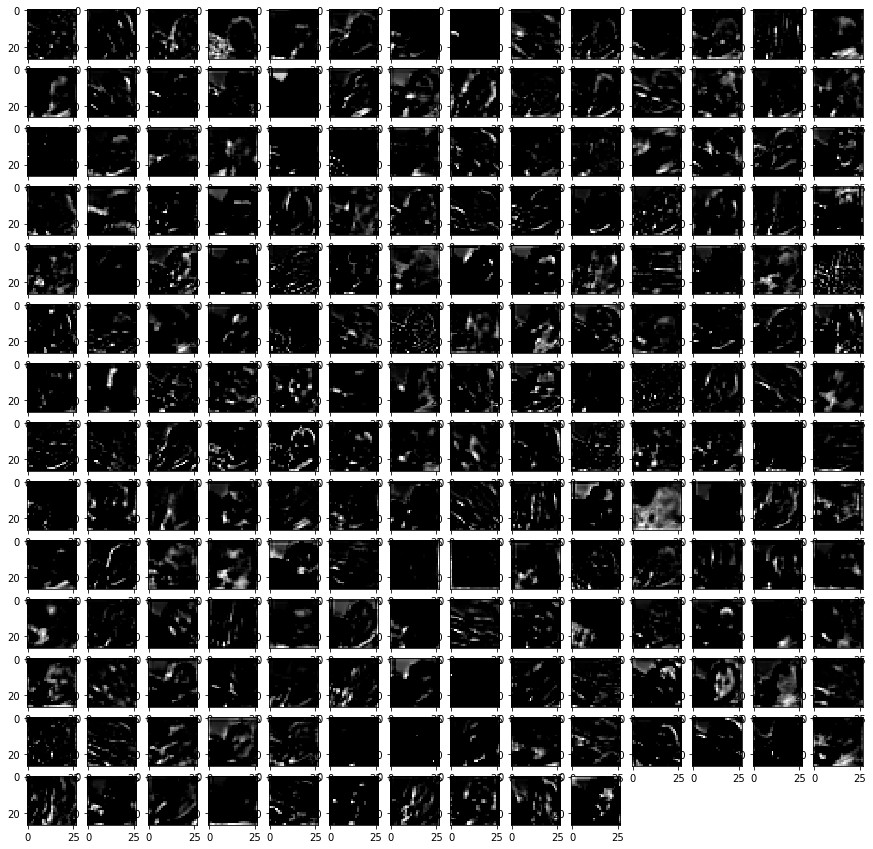

5	Name:MaxPool2d	Output size:[192, 13, 13]


<Figure size 432x288 with 0 Axes>

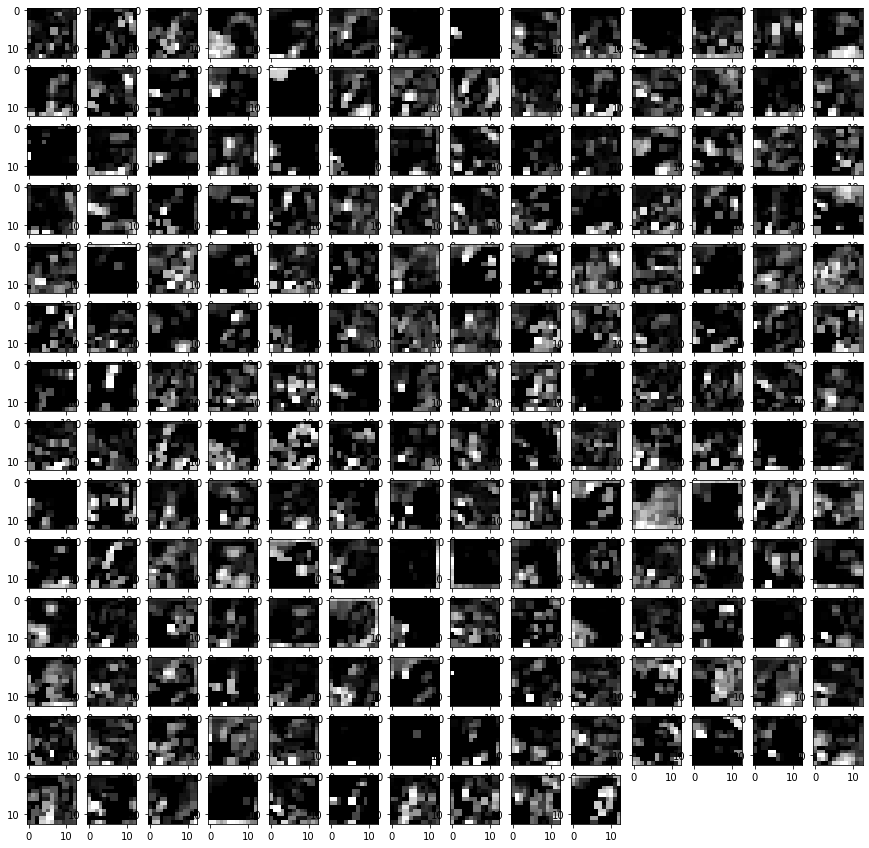

6	Name:Conv2d	Output size:[384, 13, 13]


<Figure size 432x288 with 0 Axes>

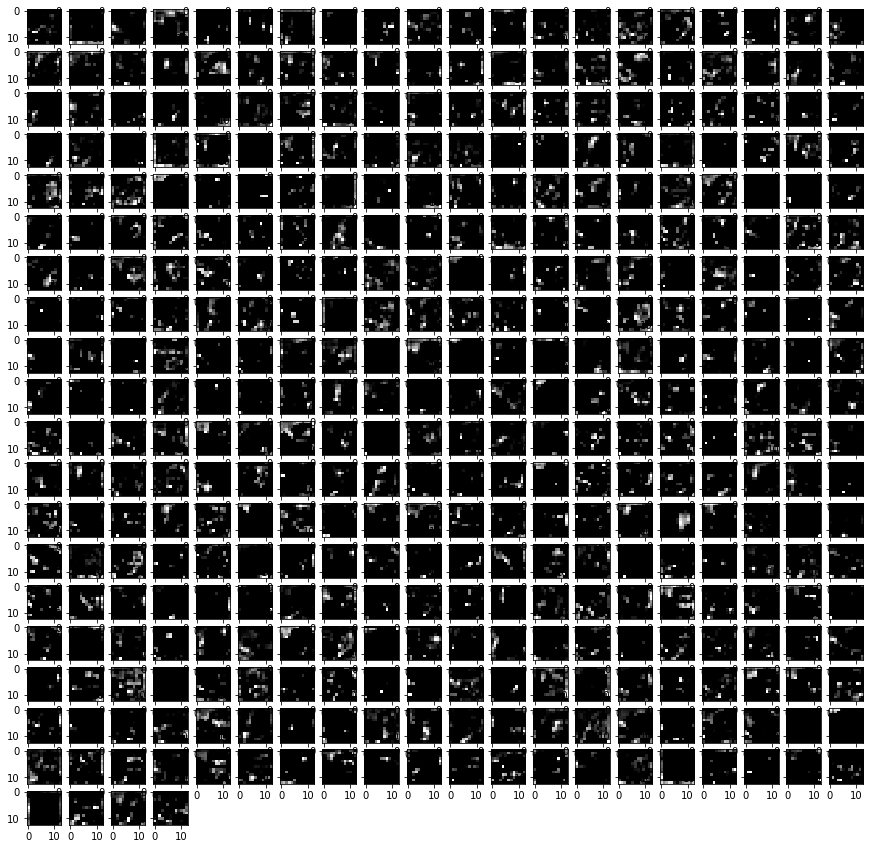

7	Name:ReLU	Output size:[384, 13, 13]


<Figure size 432x288 with 0 Axes>

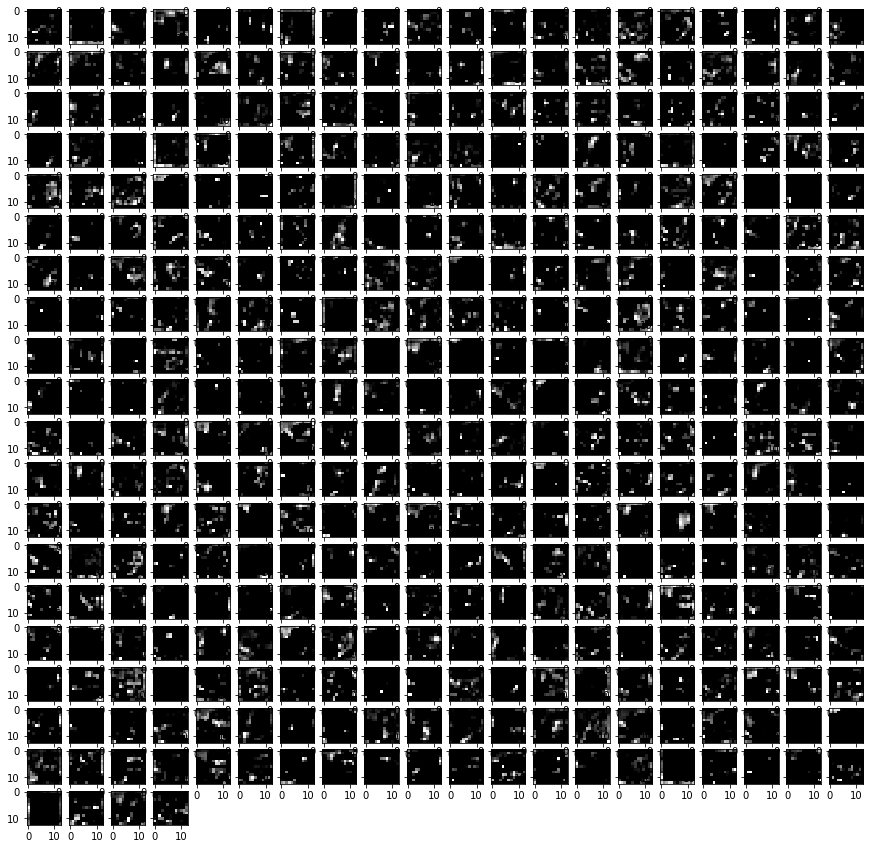

8	Name:Conv2d	Output size:[256, 13, 13]


<Figure size 432x288 with 0 Axes>

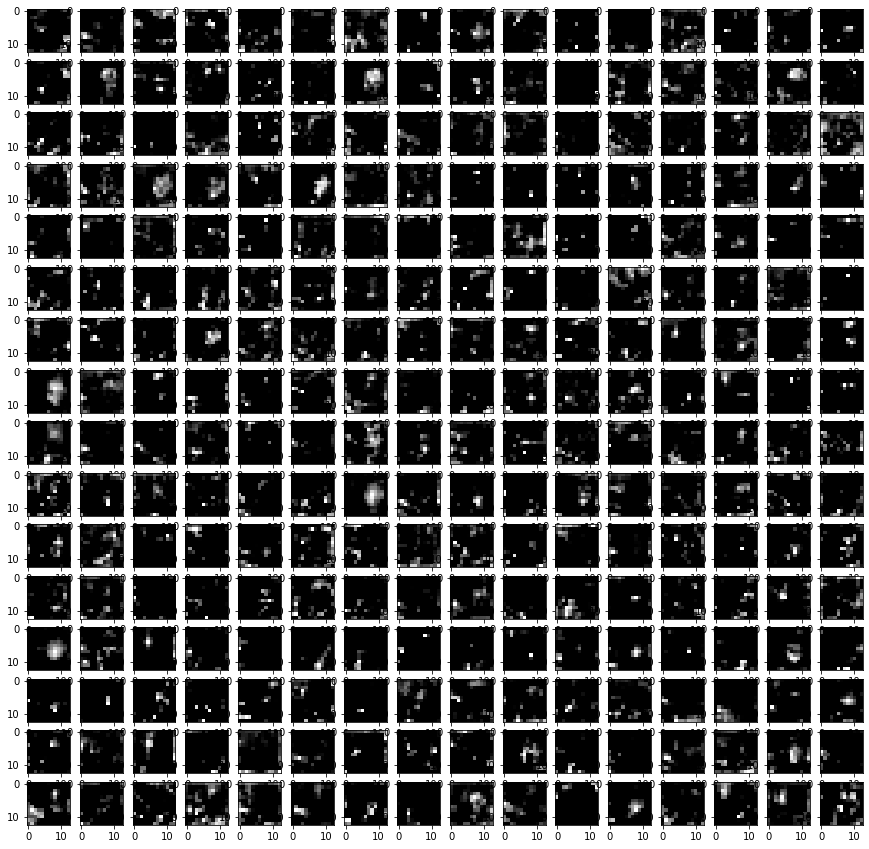

9	Name:ReLU	Output size:[256, 13, 13]


<Figure size 432x288 with 0 Axes>

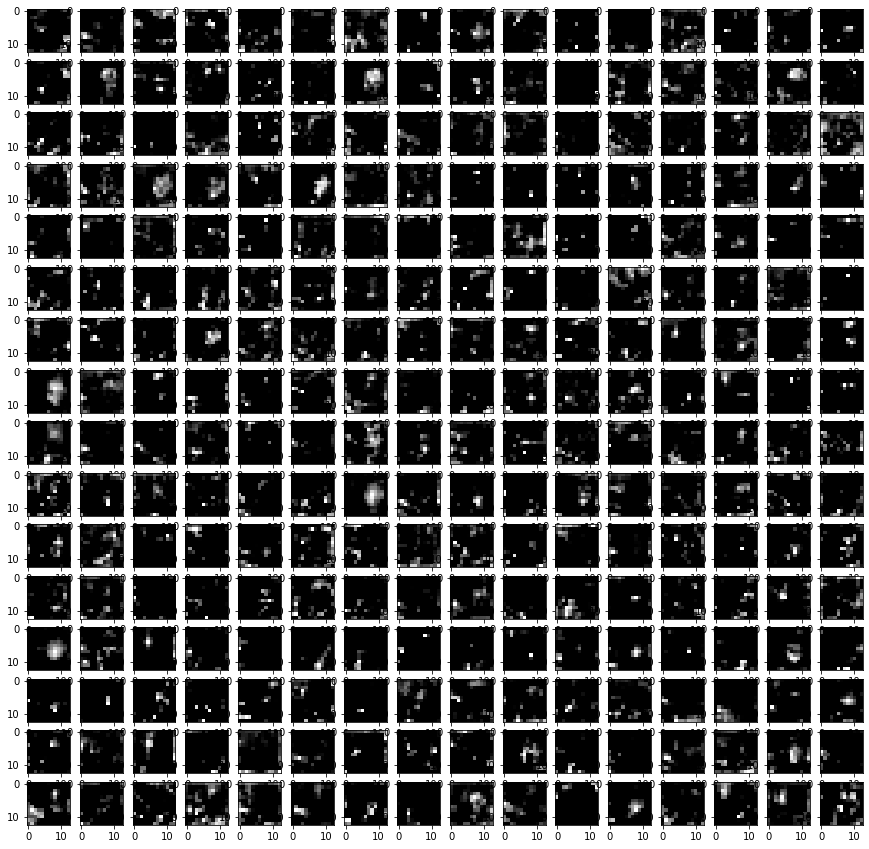

10	Name:Conv2d	Output size:[256, 13, 13]


<Figure size 432x288 with 0 Axes>

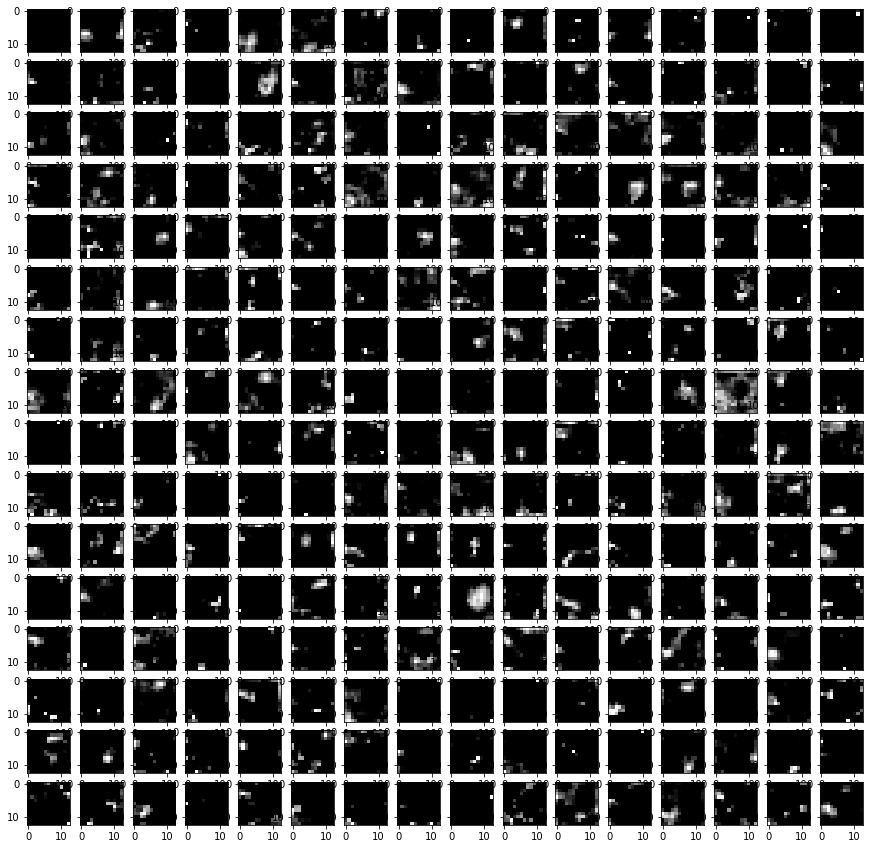

11	Name:ReLU	Output size:[256, 13, 13]


<Figure size 432x288 with 0 Axes>

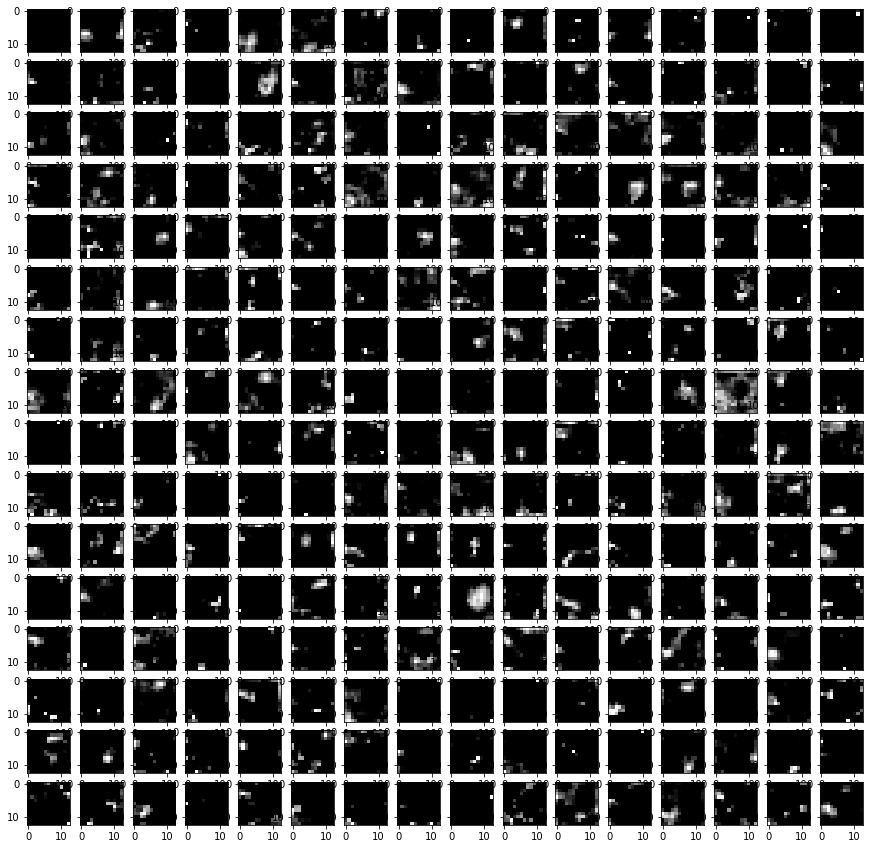

12	Name:MaxPool2d	Output size:[256, 6, 6]


<Figure size 432x288 with 0 Axes>

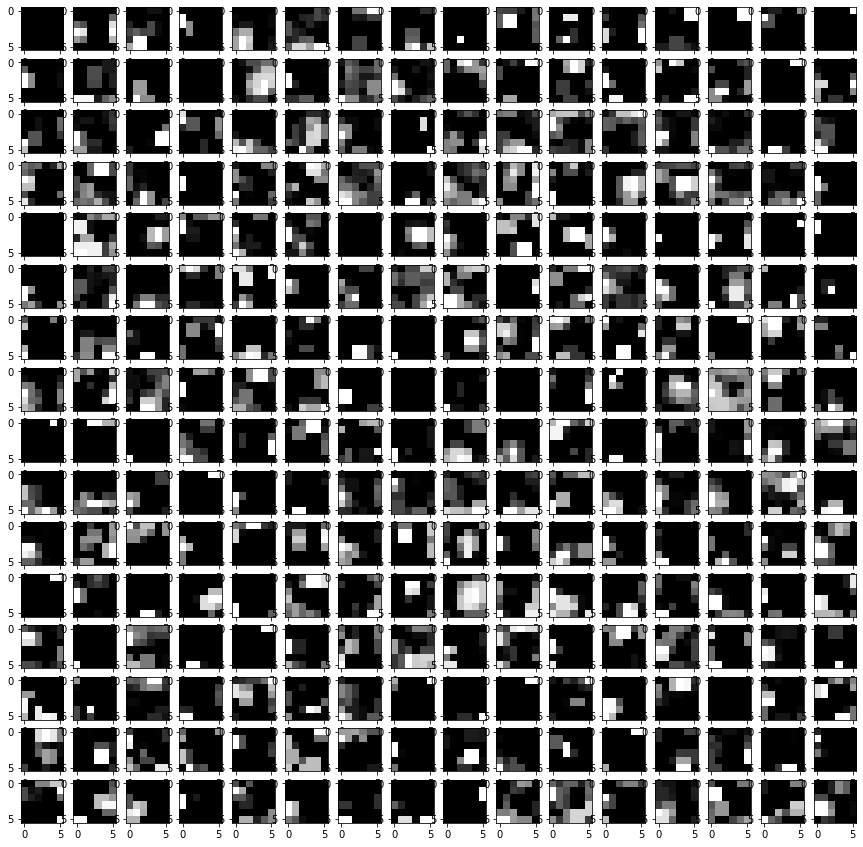

In [30]:
for i, (name, output_size, each_layer_output) in enumerate(zip(name_of_each_layer, output_size_of_each_layer, outputs_of_each_layer)):
    title = str(i) + "\tName:" + name+"\tOutput size:"+str(list(output_size[1:]))
    print(title)
    plt.gray()
    plot_out(each_layer_output.data[0], title=title)
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(os.path.join(save_dir, 'features_' + str(i) + '.png'))
    plt.show()

0	Name:Dropout	Output size:[9216]


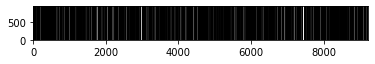

1	Name:Linear	Output size:[4096]


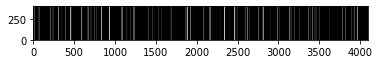

2	Name:ReLU	Output size:[4096]


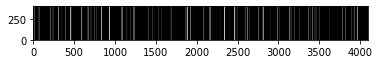

3	Name:Dropout	Output size:[4096]


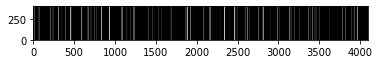

4	Name:Linear	Output size:[4096]


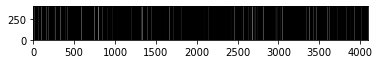

5	Name:ReLU	Output size:[4096]


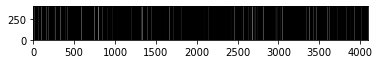

6	Name:Linear	Output size:[1000]


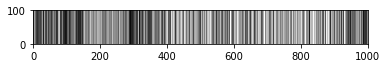

In [31]:
for i, (name, output_size, each_layer_output) in enumerate(zip(name_of_each_layer_classifier, output_size_of_each_layer_classifier, outputs_of_each_layer_classifier)):
    title = str(i) + "\tName:" + name+"\tOutput size:"+str(list(output_size[1:]))
    print(title)
    plt.gray()
    plt.imshow(each_layer_output.data, extent=(0,len(each_layer_output[0].data),0,len(each_layer_output[0].data)/10))
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(os.path.join(save_dir, 'classifier_' + str(i) + '.png'))
    plt.show()